References: 

- http://www.diva-portal.org/smash/get/diva2:1382324/FULLTEXT01.pdf
- https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/


In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from numpy import sqrt, array, random, argsort
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc


#from google.colab import drive
#drive.mount('/content/gdrive')

In [2]:
df =  pd.read_csv("https://raw.githubusercontent.com/AIML-Makgeolli/CpE-AIDL/main/thesis_database/Crop_recommendation.csv")
df_train = df.drop(['label','rainfall'], axis = 1)

Declarations

In [3]:
X_N= df_train[['N']]
X_P= df_train[['P']]
X_K= df_train[['K']]
X_temp= df_train[['temperature']]
X_moist= df_train[['humidity']]
y = df_train[['ph']]

Nitrogen and ph 

In [4]:
class hierarchical():
  def __init__(self):
    return

  def input_train(self, X_in, y_in):
    self.X = X_in
    self.y = y_in
    X_train, X_test, y_train, y_test = train_test_split(self.X, self.y,test_size=0.3, random_state=42)
    self.data = pd.concat([X_train, y_train], axis=1).to_numpy()
    return self.data

  def dendograms(self):
    plt.figure(figsize=(7, 5))
    plt.title("Dendograms")
    dend = shc.dendrogram(shc.linkage(self.data, method='ward'))

  def cluster_fit(self, clust):
    self.cluster = AgglomerativeClustering(n_clusters = clust, affinity ='euclidean', linkage='ward')
    res = self.cluster.fit_predict(self.data)
    return res

  def cluster_graph(self):
    plt.figure(figsize=(7, 5))
    plt.scatter(self.data[:,0], self.data[:,1], c=self.cluster.labels_, cmap='rainbow')


hierarchical_test = hierarchical()

Nitrogen and pH

In [5]:
hierarchical_test.input_train(X_N,y)

array([[21.        ,  5.69958697],
       [29.        ,  6.96741777],
       [60.        ,  5.72257982],
       ...,
       [11.        ,  6.47544932],
       [11.        ,  6.36114111],
       [32.        ,  7.00703752]])

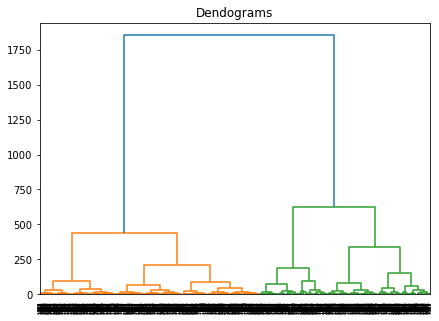

In [6]:
hierarchical_test.dendograms()

In [7]:
hierarchical_test.cluster_fit(3)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

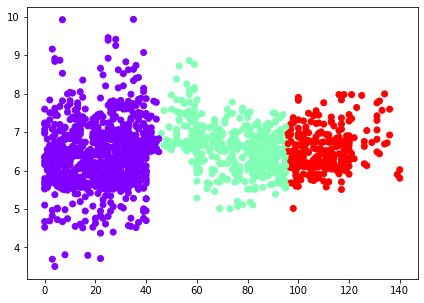

In [8]:
hierarchical_test.cluster_graph()

Phosphorus and pH

In [9]:
hierarchical_test.input_train(X_P,y)

array([[ 26.        ,   5.69958697],
       [ 35.        ,   6.96741777],
       [ 44.        ,   5.72257982],
       ...,
       [ 36.        ,   6.47544932],
       [124.        ,   6.36114111],
       [ 78.        ,   7.00703752]])

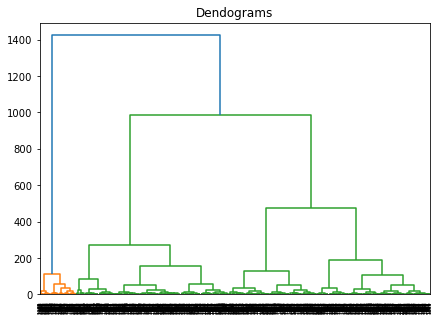

In [10]:
hierarchical_test.dendograms()

In [11]:
hierarchical_test.cluster_fit(3)

array([0, 0, 0, ..., 0, 1, 2], dtype=int64)

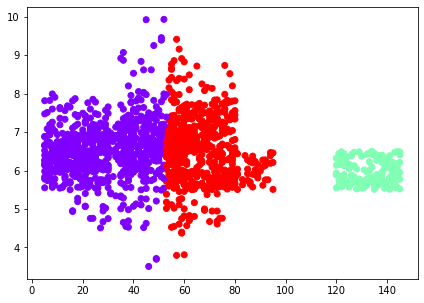

In [12]:
hierarchical_test.cluster_graph()

Potassium and pH

In [13]:
hierarchical_test.input_train(X_K,y)

array([[ 27.        ,   5.69958697],
       [ 28.        ,   6.96741777],
       [ 23.        ,   5.72257982],
       ...,
       [ 31.        ,   6.47544932],
       [204.        ,   6.36114111],
       [ 22.        ,   7.00703752]])

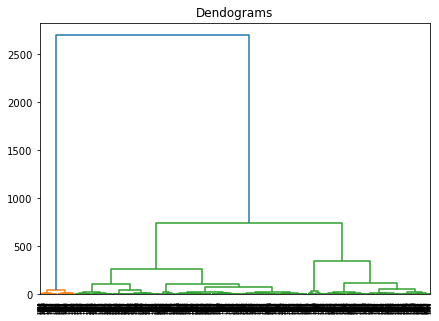

In [14]:
hierarchical_test.dendograms()

In [15]:
hierarchical_test.cluster_fit(3)

array([2, 2, 2, ..., 2, 1, 2], dtype=int64)

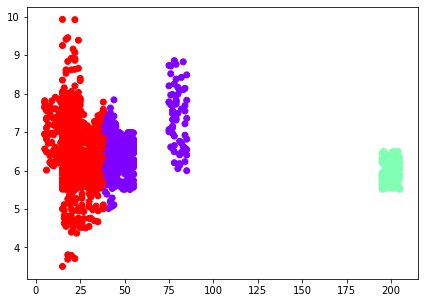

In [16]:
hierarchical_test.cluster_graph()

Temperature and pH

In [17]:
hierarchical_test.input_train(X_temp,y)

array([[27.00315545,  5.69958697],
       [28.3471611 ,  6.96741777],
       [24.7947077 ,  5.72257982],
       ...,
       [27.92063282,  6.47544932],
       [13.42988625,  6.36114111],
       [23.97081395,  7.00703752]])

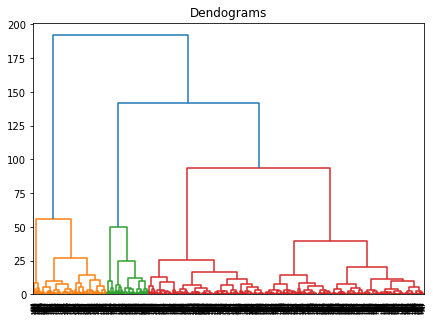

In [18]:
hierarchical_test.dendograms()

In [19]:
hierarchical_test.cluster_fit(3)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

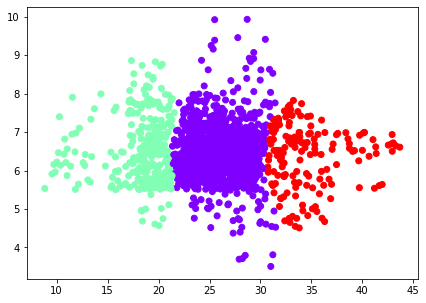

In [20]:
hierarchical_test.cluster_graph()

Moisture and pH

In [21]:
hierarchical_test.input_train(X_moist,y)

array([[47.67525434,  5.69958697],
       [53.53903102,  6.96741777],
       [70.04556743,  5.72257982],
       ...,
       [51.77965917,  6.47544932],
       [80.06633966,  6.36114111],
       [62.35557553,  7.00703752]])

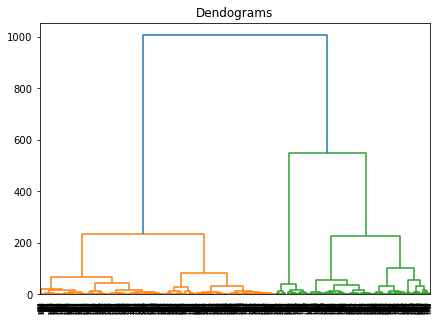

In [22]:
hierarchical_test.dendograms()

In [23]:
hierarchical_test.cluster_fit(3)

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

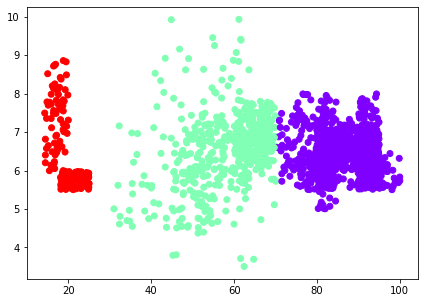

In [24]:
hierarchical_test.cluster_graph()